# Assignment 3

#### Student ID: *Double click here to fill the Student ID*

#### Name: *Double click here to fill the name*

In [ ]:
!pip install git+https://github.com/phonchi/playground-data.git -qq
!pip install cleanlab -qq
!pip install scikeras -qq

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
import plygdata as pg
from plygdata.playground import Player
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import cross_val_predict
from cleanlab.filter import find_label_issues
from scikeras.wrappers import KerasClassifier, KerasRegressor
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2023)
tf.random.set_seed(2023)

## Q1: Exploring the TensorFlow playground

[TensorFlow Neural Net Playground](http://playground.tensorflow.org/) is an interactive, web-based visualization tool to facilitate a deeper understanding of neural networks and their underlying concepts. It allows users to experiment with various neural network architectures, hyperparameters, and activation functions in real-time, without extensive coding or expertise in machine learning. The Playground features a simple, user-friendly interface that visually represents the neural network's structure and learning process. Users can adjust the number of layers, neurons, learning rate, regularization techniques, and more while observing how these changes impact the network's performance on synthetic datasets.

In this exercise, we will explore the web interface and replicate the experiment using `Python` (You are free to use `Tensorflow`, `Pytorch` or other libraries to do the exercise).

#### (a) Execute the following steps first:
1. Choose the circle dataset (top-right dataset under "DATA" panel). 
2. Reduce the hidden layer to only one layer and change the activation function to "ReLu". 
3. Run the model five times. Before each trial, hit the "Reset the network" button to get a new random initialization. (The "Reset the network" button is the circular reset arrow just to the left of the Play button.) 
4. Let each trial run for at least 500 epochs to ensure convergence. 

Make some comments about the role of initialization in this non-convex optimization problem. What is the minimum number of neurons required (Keeping all other parameters unchanged) to ensure that it almost always converges to global minima (where the test loss is below 0.015)? Finally, paste the convergence results below.

* Note the convergence pictures should include all the settings and the model. An example is available [here](https://drive.google.com/file/d/1zLN-bNtiHNc1x8Ne1-a572nRQRt7AMph/view?usp=sharing) (The setting is the default and you need to change it according to the problem).

**Ans**: Initialization plays an important role in this non-convex optimization problem. The results are slightly different every time we reset the network due to the random initialization. In my case, I have to use four neurons in the hidden layer to ensure that it always converges to the global minimum. 

The results are below:

<p align="center">
<img src="https://drive.google.com/uc?id=1zLImV-RIKiBcxyMlT4hkBsZ4rPst3QxC" alt="drawing" width="600"/>
</p>

#### (b) Execute the following code to import the circle dataset and plot the data and decision boundary:

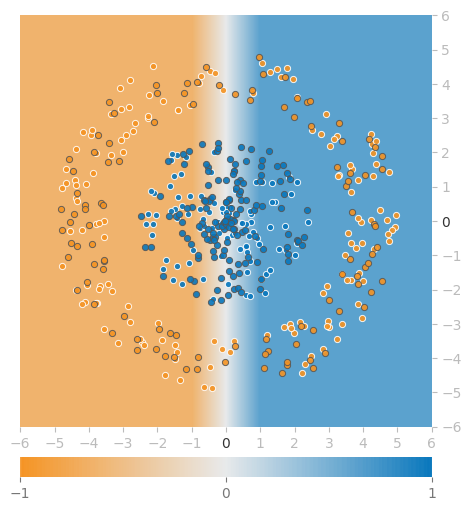

In [ ]:
data_noise = 0
validation_data_ratio = 0.5

# Generate data
data_array = pg.generate_data(pg.DatasetType.ClassifyCircleData, data_noise)
X_train, y_train, X_valid, y_valid = pg.split_data(data_array, validation_size=validation_data_ratio)

# Plot the data on the standard graph for Playground
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
# draw the decision boundary of X1 input (feature)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, discretize=False);

Now build the DNN you find in (a) and train the DNN with SGD optimizer, report the final accuracy on the validation set and plot the decision boundary using the following code:

```python
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
prob = model.predict(xx) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);
```

Plot the learning curve (loss and accuracy vs. epochs) during training. Do your results match (a)?

Hint: The label is `-1` and `1` by default in the playground; you can change them to 0, 1 and use `sigmoid` in the final layer with binary cross entropy as the loss function. In addition, your loss may be slightly higher than the one in the playground if you use binary cross entropy as the loss function. You don't have to deal with this discrepancy in this exercise.

In [ ]:
y_train = (y_train + 1) // 2
y_valid = (y_valid + 1) // 2

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2023)
tf.random.set_seed(2023)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3*1e-2)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=500, batch_size=10, 
                    validation_data=(X_valid, y_valid))

Epoch 1/500
25/25 [==============================] - 6s 14ms/step - loss: 0.5438 - accuracy: 0.5960 - val_loss: 0.6092 - val_accuracy: 0.4960
Epoch 2/500
25/25 [==============================] - 0s 6ms/step - loss: 0.5048 - accuracy: 0.6680 - val_loss: 0.5776 - val_accuracy: 0.5800
Epoch 3/500
25/25 [==============================] - 0s 7ms/step - loss: 0.4760 - accuracy: 0.7360 - val_loss: 0.5469 - val_accuracy: 0.6320
Epoch 4/500
25/25 [==============================] - 0s 6ms/step - loss: 0.4514 - accuracy: 0.7720 - val_loss: 0.5172 - val_accuracy: 0.7120
Epoch 5/500
25/25 [==============================] - 0s 6ms/step - loss: 0.4282 - accuracy: 0.7800 - val_loss: 0.4882 - val_accuracy: 0.7560
Epoch 6/500
25/25 [==============================] - 0s 6ms/step - loss: 0.4067 - accuracy: 0.8080 - val_loss: 0.4630 - val_accuracy: 0.7840
Epoch 7/500
25/25 [==============================] - 0s 6ms/step - loss: 0.3856 - accuracy: 0.8200 - val_loss: 0.4388 - val_accuracy: 0.8000
Epoch 8/500


313/313 [==============================] - 0s 1ms/step


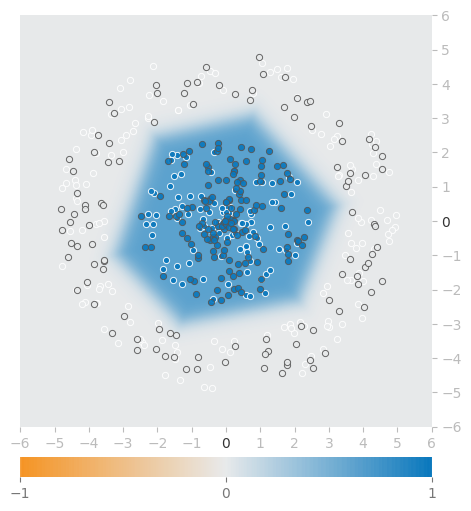

In [ ]:
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
prob = model.predict(xx) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);

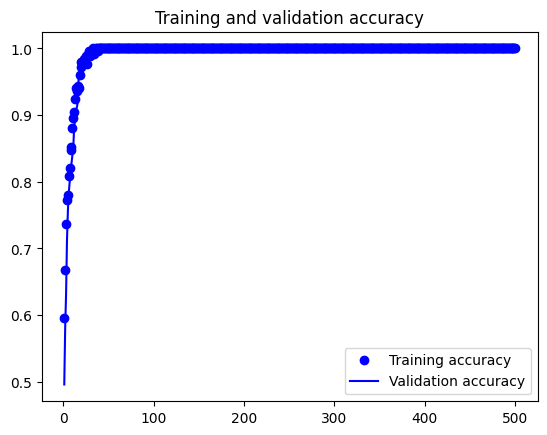

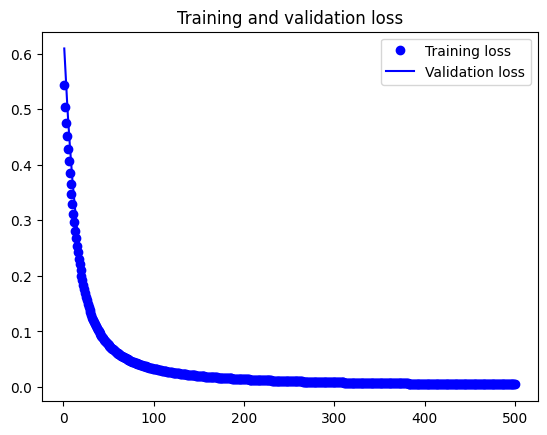

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

The results is consistent with (a).

#### (c) Execute the following steps first:
1. Change the dataset to the spiral (bottom-right dataset under "DATA" panel). 
2. Increase the noise level to 50 and leave the training and test set ratio unchanged. 
3. Train the best model you can. Feel free to add or remove layers and neurons. You can also change learning settings like learning rate, regularization rate, activations and batch size. In addition, you can also increase the input features to include interaction terms or others. Try to get the test loss below 0.15. 

How many parameters do you have in your models? Describe the model architecture and the training strategy you use. Finally, paste the convergence results below. 

* You may need to train the model for enough epochs here and use learning rate scheduling manually.

**Ans:** My architecture uses three hidden layers where the number of neurons is 8,6 and 4, respectively. To avoid overfitting, I also add L2 regularization with a regularization rate set to 0.001. I train the model for roughly 1000 epochs with a learning rate equal to 0.1, followed by another 1000 epochs with a learning rate of 0.01.

The number of parameters in this model is $(2+1)*8+(8+1)*6+(6+1)*4+(4+1)*1=111$

The results are below:

<p align="center">
<img src="https://drive.google.com/uc?id=1zLN3fcj7qlobfYWtnBQ2dzwveNsmAovt" alt="drawing" width="600"/>
</p>

#### (d) Execute the following code to import the spircal dataset and plot the data and decision boundary:

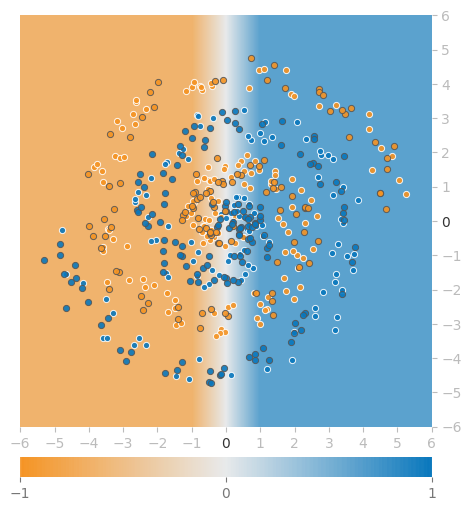

In [ ]:
data_noise=0.5
validation_data_ratio = 0.5

# Generate data
data_array = pg.generate_data(pg.DatasetType.ClassifySpiralData, data_noise)


X_train, y_train, X_valid, y_valid = pg.split_data(data_array, validation_size=validation_data_ratio)


# Plot the data on the standard graph for Playground
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, discretize=False);

Now build the DNN you find in (c) and train the DNN with SGD optimizer, report the final accuracy on the validation set and plot the decision boundary using the following code:

```python
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
prob = model.predict(xx) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);
```


Plot the learning curve during training. Do your results match (c)?

Hint: Your loss may be slightly higher than the one in the playground if you use binary cross entropy as the loss function. You don't have to deal with this discrepancy in this exercise.

The first possible architecture:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer

In [ ]:
def sin_transformer():
    return FunctionTransformer(lambda x: np.sin(x/np.pi))

In [ ]:
sin1 = sin_transformer()
sin2 = sin_transformer()
x6 = sin1.fit_transform(X_train[:,0]).reshape(-1, 1)
x7 = sin2.fit_transform(X_train[:,1]).reshape(-1, 1)
x6_v = sin1.transform(X_valid[:,0]).reshape(-1, 1)
x7_v = sin2.transform(X_valid[:,1]).reshape(-1, 1)

In [ ]:
poly = PolynomialFeatures(2, include_bias=False)
x1 = poly.fit_transform(X_train)
x1_v = poly.transform(X_valid)

In [ ]:
x_t = np.hstack([x1, x6, x7])
x_v = np.hstack([x1_v, x6_v, x7_v])

In [ ]:
y_train = (y_train + 1) // 2
y_valid = (y_valid + 1) // 2

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2023)
tf.random.set_seed(2023)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=x_t.shape[1:]),
    tf.keras.layers.Dense(8, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dense(8, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dense(8, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dense(8, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def scheduler(epoch, lr):
  if epoch < 250:
    return 0.1
  else:
    return 0.03

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-1)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(x_t, y_train, epochs=500, batch_size=10, 
                    validation_data=(x_v, y_valid), callbacks=[callback])

Epoch 1/500
25/25 [==============================] - 1s 13ms/step - loss: 0.8032 - accuracy: 0.5760 - val_loss: 0.8006 - val_accuracy: 0.4280 - lr: 0.1000
Epoch 2/500
25/25 [==============================] - 0s 6ms/step - loss: 0.7860 - accuracy: 0.5680 - val_loss: 0.8115 - val_accuracy: 0.4240 - lr: 0.1000
Epoch 3/500
25/25 [==============================] - 0s 6ms/step - loss: 0.7764 - accuracy: 0.5720 - val_loss: 0.8284 - val_accuracy: 0.4280 - lr: 0.1000
Epoch 4/500
25/25 [==============================] - 0s 6ms/step - loss: 0.7705 - accuracy: 0.5760 - val_loss: 0.8277 - val_accuracy: 0.4240 - lr: 0.1000
Epoch 5/500
25/25 [==============================] - 0s 6ms/step - loss: 0.7629 - accuracy: 0.5880 - val_loss: 0.7928 - val_accuracy: 0.4280 - lr: 0.1000
Epoch 6/500
25/25 [==============================] - 0s 6ms/step - loss: 0.7644 - accuracy: 0.5720 - val_loss: 0.8079 - val_accuracy: 0.4040 - lr: 0.1000
Epoch 7/500
25/25 [==============================] - 0s 6ms/step - loss: 0.

In [ ]:
# Plot the data on the standard graph for Playground
xx = Player.get_boundary_array()
x6_te = sin1.transform(xx[:,0]).reshape(-1, 1)
x7_te = sin2.transform(xx[:,1]).reshape(-1, 1)
x1_te = poly.transform(xx)
x_te = np.hstack([x1_te, x6_te, x7_te])

313/313 [==============================] - 1s 2ms/step


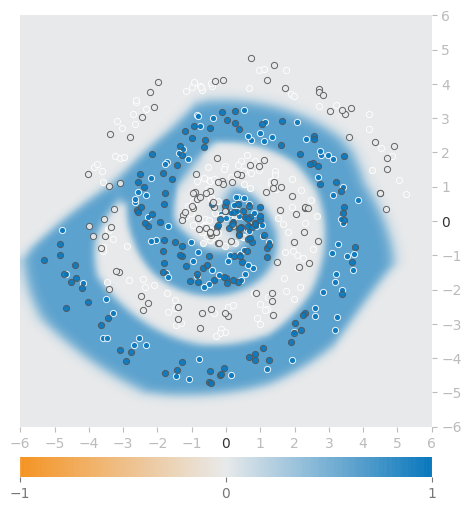

In [ ]:
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
prob = model.predict(x_te) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);

The other architecture based on (c):

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2023)
tf.random.set_seed(2023)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(8, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(6, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(4, activation="relu", kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def scheduler(epoch, lr):
  if epoch < 1000:
    return 0.1
  else:
    return 0.01

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-1)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=2000, batch_size=10, 
                    validation_data=(X_valid, y_valid), callbacks=[callback])

Epoch 1/2000
25/25 [==============================] - 1s 12ms/step - loss: 0.7080 - accuracy: 0.5280 - val_loss: 0.6994 - val_accuracy: 0.4960 - lr: 0.1000
Epoch 2/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5600 - val_loss: 0.7094 - val_accuracy: 0.4680 - lr: 0.1000
Epoch 3/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.6867 - accuracy: 0.5680 - val_loss: 0.7138 - val_accuracy: 0.4760 - lr: 0.1000
Epoch 4/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.6846 - accuracy: 0.5560 - val_loss: 0.7162 - val_accuracy: 0.4760 - lr: 0.1000
Epoch 5/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.6811 - accuracy: 0.5880 - val_loss: 0.7070 - val_accuracy: 0.4640 - lr: 0.1000
Epoch 6/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.6798 - accuracy: 0.5800 - val_loss: 0.7117 - val_accuracy: 0.4880 - lr: 0.1000
Epoch 7/2000
25/25 [==============================] - 0s 6ms/step - l

313/313 [==============================] - 0s 1ms/step


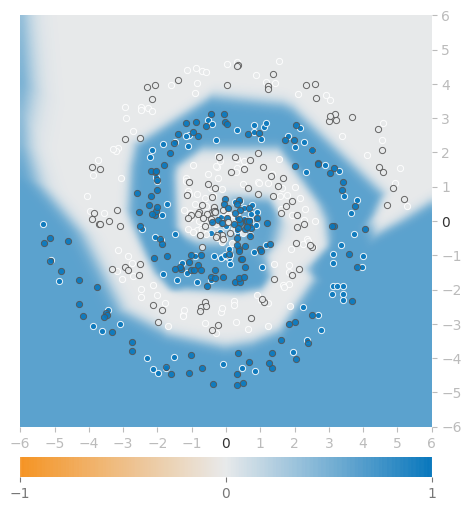

In [ ]:
# Plot the data on the standard graph for Playground
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
prob = model.predict(xx) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);

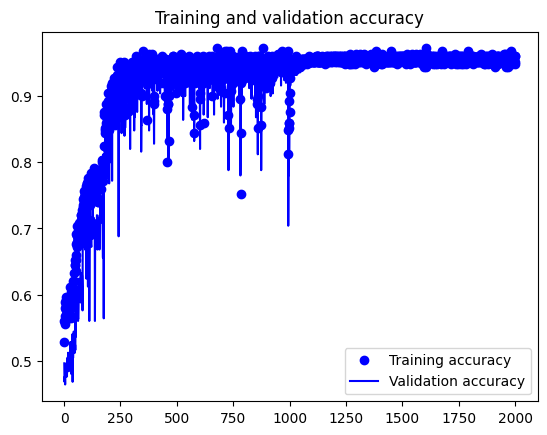

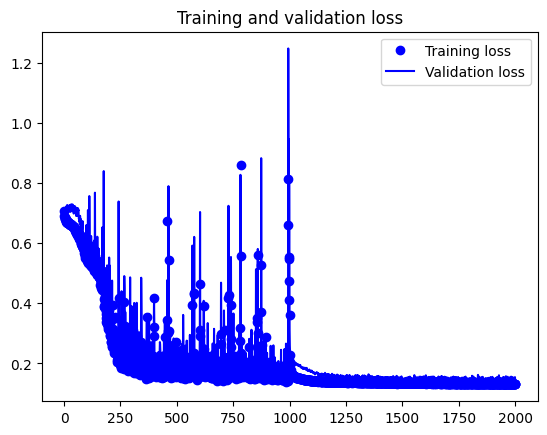

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

The results is consistent with (c).

#### (e) You may find the learning curve you get in (d) is noisy and require many epochs to converge. Try to improve the DNN in (d) by changing the network architecture, learning rate schedule, or optimizer so that the learning curve becomes smoother and converges faster.

Finally, plot the learning curve during training and the decision boundary using the following code:

```python
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
prob = model.predict(xx) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);
```

We change the optimizer and activation function here:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2023)
tf.random.set_seed(2023)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(8, kernel_initializer=tf.keras.initializers.HeNormal),
    tf.keras.layers.Activation("swish"),
    tf.keras.layers.Dense(6, kernel_initializer=tf.keras.initializers.HeNormal),
    tf.keras.layers.Activation("swish"),
    tf.keras.layers.Dense(4, kernel_initializer=tf.keras.initializers.HeNormal),
    tf.keras.layers.Activation("swish"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 activation_1 (Activation)   (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 activation_2 (Activation)   (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [ ]:
optimizer = tf.keras.optimizers.experimental.Nadam(learning_rate=5*1e-3)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=500, batch_size=10, 
                    validation_data=(X_valid, y_valid))

Epoch 1/500
25/25 [==============================] - 3s 12ms/step - loss: 0.6917 - accuracy: 0.5320 - val_loss: 0.6934 - val_accuracy: 0.4600
Epoch 2/500
25/25 [==============================] - 0s 6ms/step - loss: 0.6623 - accuracy: 0.5960 - val_loss: 0.6733 - val_accuracy: 0.5080
Epoch 3/500
25/25 [==============================] - 0s 6ms/step - loss: 0.6451 - accuracy: 0.5920 - val_loss: 0.6608 - val_accuracy: 0.5280
Epoch 4/500
25/25 [==============================] - 0s 6ms/step - loss: 0.6296 - accuracy: 0.6160 - val_loss: 0.6413 - val_accuracy: 0.5280
Epoch 5/500
25/25 [==============================] - 0s 6ms/step - loss: 0.6110 - accuracy: 0.6280 - val_loss: 0.6266 - val_accuracy: 0.5600
Epoch 6/500
25/25 [==============================] - 0s 6ms/step - loss: 0.5888 - accuracy: 0.6560 - val_loss: 0.6029 - val_accuracy: 0.6400
Epoch 7/500
25/25 [==============================] - 0s 6ms/step - loss: 0.5690 - accuracy: 0.6840 - val_loss: 0.5867 - val_accuracy: 0.6600
Epoch 8/500


313/313 [==============================] - 1s 1ms/step


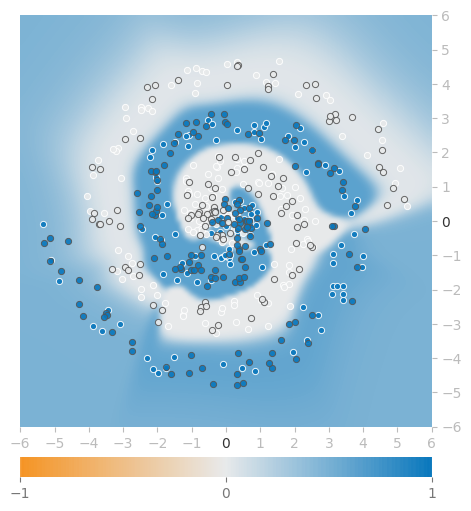

In [ ]:
# Plot the data on the standard graph for Playground
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
prob = model.predict(xx) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);

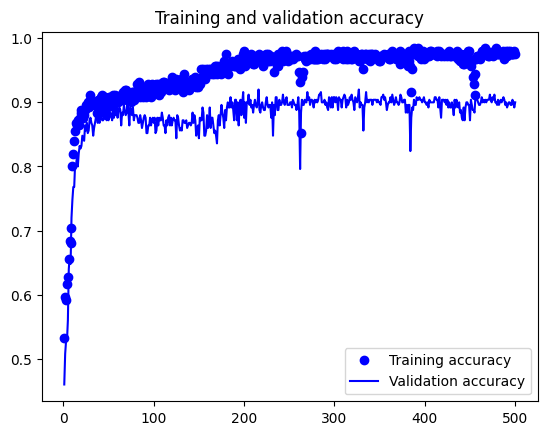

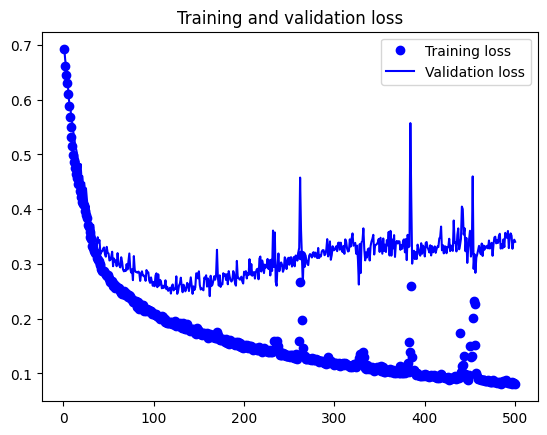

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Q2 Explore the CNN explainer

[CNN Explainer](https://poloclub.github.io/cnn-explainer/) is an interactive, open-source visualization tool designed to provide a comprehensive understanding of Convolutional Neural Networks (CNNs). The explainer aims to demystify the inner workings of CNNs through visualizations and step-by-step explanations. The platform offers a guided walkthrough of the building blocks of CNNs, including convolutional layers, activation functions, pooling layers, and fully connected layers. It allows users to interactively explore the components, visualize feature maps, and understand the effects of different hyperparameters on the network's performance. 

In this exercise, we will explore the web interface and replicate the experiment using `Python` (You are free to use `Tensorflow`, `Pytorch` or other libraries to do the exercise).

#### (a) Firstly, explore the CNN explainer and answer the following questions:

1. What is the shape of the input and output of the network?
2. What are the kernel size, stride, padding, and number of filters used in the conv layer?
3. What are the kernel size, stride, and number of filters used in the pooling layer?
4. How many parameters are used in the final dense layer?

**Ans:**

1. The shape of input and output are (32, 32, 3) and 10, respectively.
2. The kernel size is 3, stride is 1, padding is valid and number of filters is 10.
3. The kernel size is 2, stride is 2, number of fileters is 10.
4. The total number of parameters are (1690+1)*10 = 16910

#### (b) Based on the observation in (a), build the same CNN using `Python` and report the total number of parameters and architecture using `summary()`. Remember to rescale or normalize the input before feeding it into the network.

In [ ]:
NUM_CLASS = 10
filters = 10

tf.keras.backend.clear_session()

tiny_vgg = tf.keras.Sequential([
    tf.keras.Input(shape=(64, 64, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters, (3, 3), name='conv_1_1'),
    tf.keras.layers.Activation('relu', name='relu_1_1'),
    tf.keras.layers.Conv2D(filters, (3, 3), name='conv_1_2'),
    tf.keras.layers.Activation('relu', name='relu_1_2'),
    tf.keras.layers.MaxPool2D((2, 2), name='max_pool_1'),

    tf.keras.layers.Conv2D(filters, (3, 3), name='conv_2_1'),
    tf.keras.layers.Activation('relu', name='relu_2_1'),
    tf.keras.layers.Conv2D(filters, (3, 3), name='conv_2_2'),
    tf.keras.layers.Activation('relu', name='relu_2_2'),
    tf.keras.layers.MaxPool2D((2, 2), name='max_pool_2'),

    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(NUM_CLASS, activation='softmax', name='output')
])

tiny_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv_1_1 (Conv2D)           (None, 62, 62, 10)        280       
                                                                 
 relu_1_1 (Activation)       (None, 62, 62, 10)        0         
                                                                 
 conv_1_2 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 relu_1_2 (Activation)       (None, 60, 60, 10)        0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 30, 30, 10)        0         
                                                                 
 conv_2_1 (Conv2D)           (None, 28, 28, 10)        9

#### (c) Download the dataset from our course website and load the training, validation and testing dataset from the folders `class_10_train`, `class_10_val/val_images` and `class_10_val/test_images`, respectively. Remember to resize the images to $64 \times 64$ and set the batch size to 32. Finally, draw `9` random samples from the training set and plot them.

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1zLUix-v08cUQViCaamjutM-FXn6eD1IL/view?usp=sharing
!unzip data_hw3.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: class_10_train/n02165456/n02165456_127.JPEG  
  inflating: class_10_train/n02165456/n02165456_128.JPEG  
  inflating: class_10_train/n02165456/n02165456_129.JPEG  
  inflating: class_10_train/n02165456/n02165456_13.JPEG  
  inflating: class_10_train/n02165456/n02165456_130.JPEG  
  inflating: class_10_train/n02165456/n02165456_131.JPEG  
  inflating: class_10_train/n02165456/n02165456_132.JPEG  
  inflating: class_10_train/n02165456/n02165456_133.JPEG  
  inflating: class_10_train/n02165456/n02165456_134.JPEG  
  inflating: class_10_train/n02165456/n02165456_135.JPEG  
  inflating: class_10_train/n02165456/n02165456_136.JPEG  
  inflating: class_10_train/n02165456/n02165456_137.JPEG  
  inflating: class_10_train/n02165456/n02165456_138.JPEG  
  inflating: class_10_train/n02165456/n02165456_139.JPEG  
  inflating: class_10_train/n02165456/n02165456_14.JPEG  
  inflating: class_10_train/n02165456/n02165456_140.JPEG  
  inflating: class_10_train/n02165456

In [ ]:
training_images = 'class_10_train/'
vali_images = 'class_10_val/val_images/'
test_images = 'class_10_val/test_images/'

In [ ]:
train_dataset = image_dataset_from_directory(
    training_images,
    image_size=(64, 64),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    vali_images,
    image_size=(64, 64),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    test_images,
    image_size=(64, 64),
    batch_size=32)

Found 5000 files belonging to 10 classes.
Found 250 files belonging to 10 classes.
Found 250 files belonging to 10 classes.


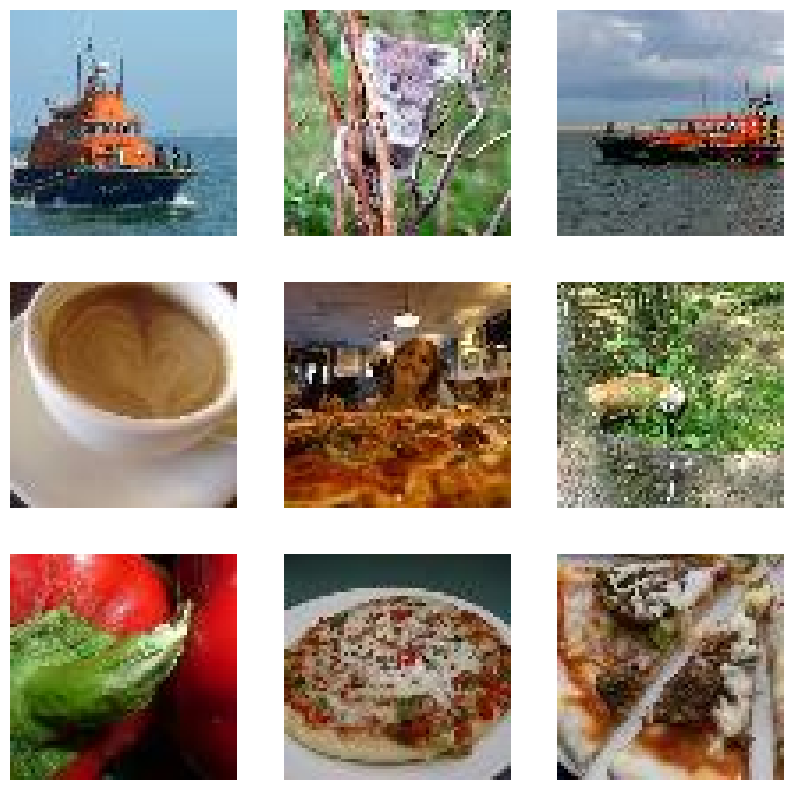

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): #Sample 1 batch from the dataset
    for i in range(9):
      # During inference time, the output will be identical to input. 
      # Call the layer with training=True to flip the input.
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

#### (d) First, add the callback to monitor the validation loss and save the best model base on the validation loss. Secondly, train the model you build in (b) with the Adam optimizer for 50 epochs. Thirdly, plot the learning curve after training. Finally, reload the best model and report the accuracy on the test set.

In [ ]:
np.random.seed(2023)
tf.random.set_seed(2023)
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9)
tiny_vgg.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=20)


callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
    #lr_scheduler 
]
history = tiny_vgg.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
157/157 [==============================] - 8s 8ms/step - loss: 1.8982 - accuracy: 0.2964 - val_loss: 1.7402 - val_accuracy: 0.4160
Epoch 2/50
157/157 [==============================] - 1s 6ms/step - loss: 1.4570 - accuracy: 0.4938 - val_loss: 1.4346 - val_accuracy: 0.5240
Epoch 3/50
157/157 [==============================] - 1s 6ms/step - loss: 1.2258 - accuracy: 0.5698 - val_loss: 1.2535 - val_accuracy: 0.6080
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 1.0452 - accuracy: 0.6456 - val_loss: 1.2326 - val_accuracy: 0.5880
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.9584 - accuracy: 0.6766 - val_loss: 1.1586 - val_accuracy: 0.5920
Epoch 6/50
157/157 [==============================] - 1s 6ms/step - loss: 0.9191 - accuracy: 0.6936 - val_loss: 1.2028 - val_accuracy: 0.5960
Epoch 7/50
157/157 [==============================] - 1s 6ms/step - loss: 0.8389 - accuracy: 0.7154 - val_loss: 1.0846 - val_accuracy: 0.6520
Epoch 

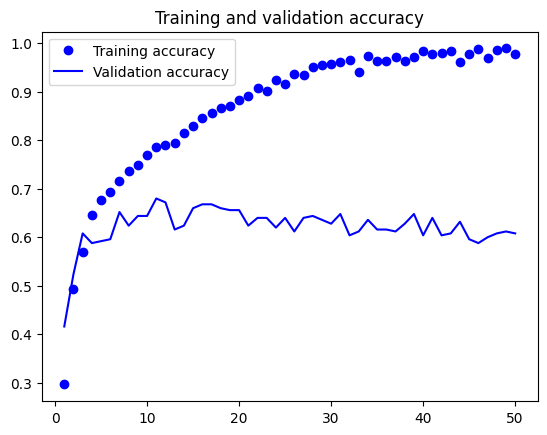

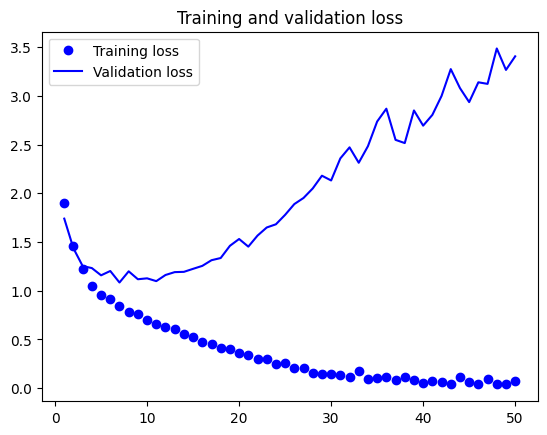

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
tiny_vgg.load_weights("convnet_from_scratch.keras")
test_loss, test_acc = tiny_vgg.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

8/8 [==============================] - 0s 3ms/step - loss: 0.9289 - accuracy: 0.6880
Test accuracy: 0.688


#### (e) Looking at the learning curves, you can see that the model is overfitting. Try to add a data augmentation layer for the model in (b) as follows:

* Applies random horizontal flipping 
* Rotates the input images by a random value in the range `[–36 degrees, +36 degrees]`)
* Zooms in or out of the image by a random factor in the range `[-20%, +20%]`
* Randomly choose a location to crop images down to a target size `[56, 56]`
* Randomly adjust the contrast of images so that the resulting images are `[0.85, 1.15]` brighter or darker than the original one.

Fit your model for enough epochs (75, for instance), compare its performance and learning curves with the previous model in (d), and comment on the results. Finally, report the accuracy of the test set. Remember to reload the best model before the test.

In [ ]:
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomCrop(56,56),
        tf.keras.layers.RandomContrast(0.15)
    ]
)

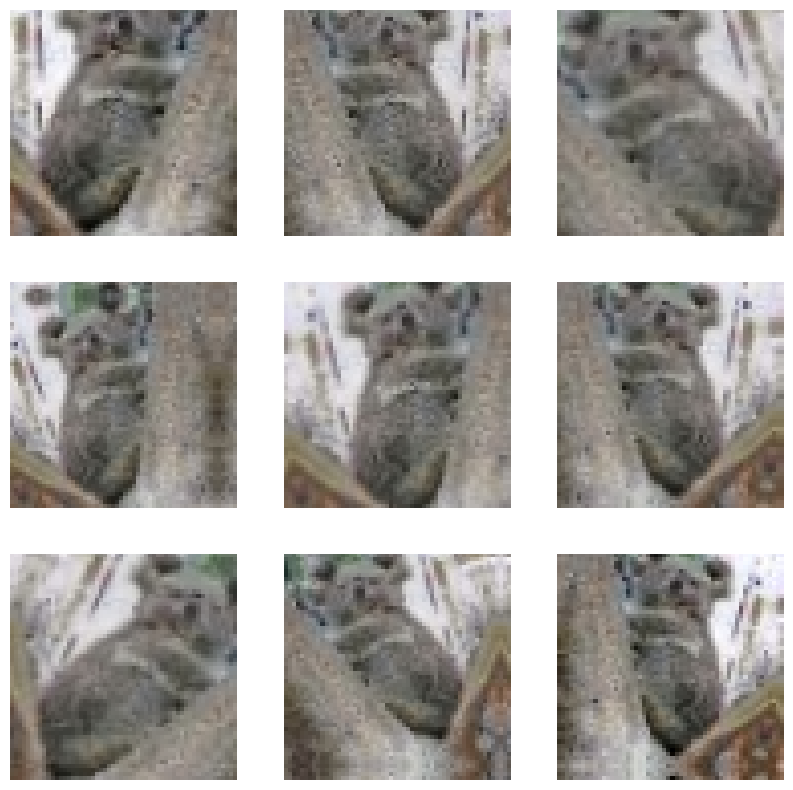

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): #Sample 1 batch from the dataset
    for i in range(9):
      # During inference time, the output will be identical to input. 
      # Call the layer with training=True to flip the input.
        augmented_images = data_augmentation(images, training=True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(2023)
tf.random.set_seed(2023)

inputs = tf.keras.Input(shape=(64, 64, 3))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = data_augmentation(inputs)
x = tf.keras.layers.Conv2D(filters, (3, 3), name='conv_1_1')(x)
x = tf.keras.layers.Activation('relu', name='relu_1_1')(x)
x = tf.keras.layers.Conv2D(filters, (3, 3), name='conv_1_2')(x)
x = tf.keras.layers.Activation('relu', name='relu_1_2')(x)
x = tf.keras.layers.MaxPool2D((2, 2), name='max_pool_1')(x)

x = tf.keras.layers.Conv2D(filters, (3, 3), name='conv_2_1')(x)
x = tf.keras.layers.Activation('relu', name='relu_2_1')(x)
x = tf.keras.layers.Conv2D(filters, (3, 3), name='conv_2_2')(x)
x = tf.keras.layers.Activation('relu', name='relu_2_2')(x)
x = tf.keras.layers.MaxPool2D((2, 2), name='max_pool_2')(x)

x = tf.keras.layers.Flatten(name='flatten')(x)
outputs = tf.keras.layers.Dense(NUM_CLASS, activation='softmax', name='output')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 sequential_1 (Sequential)   (None, 56, 56, 3)         0         
                                                                 
 conv_1_1 (Conv2D)           (None, 54, 54, 10)        280       
                                                                 
 relu_1_1 (Activation)       (None, 54, 54, 10)        0         
                                                                 
 conv_1_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 relu_1_2 (Activation)       (None, 52, 52, 10)        0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 26, 26, 10)        0     

In [ ]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=20)


callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
    #lr_scheduler 
]
history = model.fit(
    train_dataset,
    epochs=75,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/75
157/157 [==============================] - 4s 11ms/step - loss: 3.0712 - accuracy: 0.1126 - val_loss: 2.3039 - val_accuracy: 0.1640
Epoch 2/75
157/157 [==============================] - 1s 8ms/step - loss: 2.2800 - accuracy: 0.1314 - val_loss: 2.1930 - val_accuracy: 0.1920
Epoch 3/75
157/157 [==============================] - 1s 9ms/step - loss: 2.2074 - accuracy: 0.1868 - val_loss: 2.0330 - val_accuracy: 0.2640
Epoch 4/75
157/157 [==============================] - 1s 9ms/step - loss: 1.9897 - accuracy: 0.2878 - val_loss: 1.8759 - val_accuracy: 0.3120
Epoch 5/75
157/157 [==============================] - 1s 8ms/step - loss: 1.8597 - accuracy: 0.3480 - val_loss: 1.7112 - val_accuracy: 0.4320
Epoch 6/75
157/157 [==============================] - 1s 9ms/step - loss: 1.7333 - accuracy: 0.3910 - val_loss: 1.6431 - val_accuracy: 0.4160
Epoch 7/75
157/157 [==============================] - 1s 9ms/step - loss: 1.6214 - accuracy: 0.4176 - val_loss: 1.5036 - val_accuracy: 0.4680
Epoch

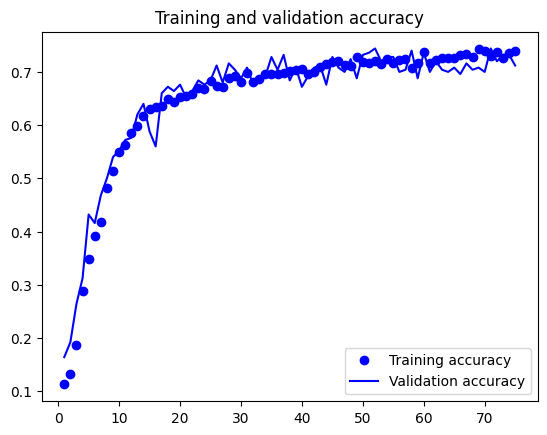

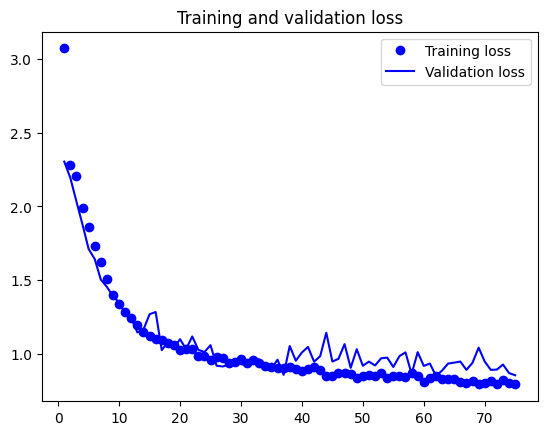

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model.load_weights("convnet_from_scratch.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

8/8 [==============================] - 0s 4ms/step - loss: 0.8143 - accuracy: 0.7600
Test accuracy: 0.760


**Ans:**　By inspecting the learning curve, we can perceive that the data augmentation can avoid the problem of overfitting.

#### (f) Use `cleanlab` to find the possible label issue with the mode you build in (b). You can follow the below procedure:

1. Wrap the model with `scikeras` or `sktorch`. Set the optimizer, epochs and batch size to `adam`, `30` and `32`, respectively.
2. Extract the image data and labels from the validation set into `X` and `y` arrays.
3. Get the out-of-sample prediction probabilities using 
```python
pred_probs = cross_val_predict(
    clf,
    X,
    y,
    cv=num_crossval_folds,
    method="predict_proba",
)
```
4. Find the top 9 possible label issues using `find_label_issues()` and plot them using `plot_examples()`.

Comment on your results.

In [ ]:
def plot_examples(id_iter, nrows=1, ncols=1):
    for count, id in enumerate(id_iter):
        plt.subplot(nrows, ncols, count + 1)
        plt.imshow(X[id].reshape(64, 64, 3).astype("uint8"))
        plt.title(f"id: {id} \n label: {labels[id]}")
        plt.axis("off")

    plt.tight_layout(h_pad=2.0)

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(64, 64, 3)),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(filters, (3, 3), name='conv_1_1'),
        tf.keras.layers.Activation('relu', name='relu_1_1'),
        tf.keras.layers.Conv2D(filters, (3, 3), name='conv_1_2'),
        tf.keras.layers.Activation('relu', name='relu_1_2'),
        tf.keras.layers.MaxPool2D((2, 2), name='max_pool_1'),

        tf.keras.layers.Conv2D(filters, (3, 3), name='conv_2_1'),
        tf.keras.layers.Activation('relu', name='relu_2_1'),
        tf.keras.layers.Conv2D(filters, (3, 3), name='conv_2_2'),
        tf.keras.layers.Activation('relu', name='relu_2_2'),
        tf.keras.layers.MaxPool2D((2, 2), name='max_pool_2'),

        tf.keras.layers.Flatten(name='flatten'),
        tf.keras.layers.Dense(NUM_CLASS, activation='softmax', name='output')
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [ ]:
# Collect images and labels
images = []
labels = []

for image_batch, label_batch in validation_dataset.unbatch():
    images.append(image_batch)
    labels.append(label_batch)

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

In [ ]:
clf = KerasClassifier(
    model=build_model,
    epochs=30,
    fit__batch_size=32
)

In [ ]:
num_crossval_folds = 3  # for efficiency; values like 5 or 10 will generally work better
pred_probs = cross_val_predict(
    clf,
    X,
    y,
    cv=num_crossval_folds,
    method="predict_proba",
)

Epoch 1/30
6/6 [==============================] - 2s 25ms/step - loss: 2.3100 - accuracy: 0.1024
Epoch 2/30
6/6 [==============================] - 0s 5ms/step - loss: 2.2839 - accuracy: 0.1265
Epoch 3/30
6/6 [==============================] - 0s 5ms/step - loss: 2.2494 - accuracy: 0.1867
Epoch 4/30
6/6 [==============================] - 0s 5ms/step - loss: 2.2004 - accuracy: 0.2470
Epoch 5/30
6/6 [==============================] - 0s 5ms/step - loss: 2.1121 - accuracy: 0.2711
Epoch 6/30
6/6 [==============================] - 0s 5ms/step - loss: 1.9717 - accuracy: 0.4157
Epoch 7/30
6/6 [==============================] - 0s 5ms/step - loss: 1.8119 - accuracy: 0.4398
Epoch 8/30
6/6 [==============================] - 0s 5ms/step - loss: 1.7244 - accuracy: 0.4940
Epoch 9/30
6/6 [==============================] - 0s 5ms/step - loss: 1.6206 - accuracy: 0.5181
Epoch 10/30
6/6 [==============================] - 0s 5ms/step - loss: 1.5324 - accuracy: 0.4880
Epoch 11/30
6/6 [=====================

In [ ]:
ranked_label_issues = find_label_issues(
    y,
    pred_probs,
    return_indices_ranked_by="self_confidence",
)

print(f"Cleanlab found {len(ranked_label_issues)} label issues.")
print(f"Top 15 most likely label errors: \n {ranked_label_issues[:15]}")

Cleanlab found 147 label issues.
Top 15 most likely label errors: 
 [ 54  38  73 200  95 193  29 238  93 211 127 199  79 197  67]


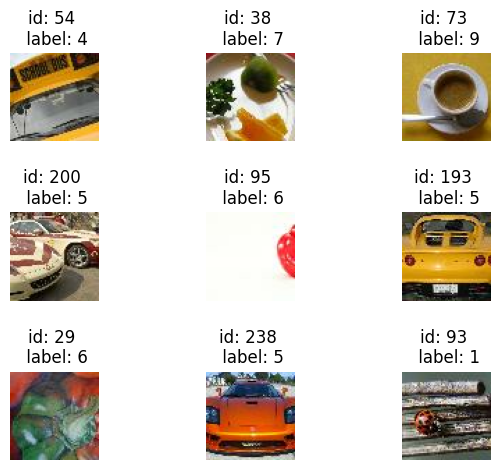

In [ ]:
plot_examples(ranked_label_issues[range(9)], 3, 3)

The image with label issue are shown as above and some of them appears weird.